In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
from time import time
import xgboost as xgb
import pickle

In [ ]:
data = pd.read_csv('hcare.csv')

In [ ]:
print(f'Dataset shape: {data.shape}')

Dataset shape: (70060, 19)


In [ ]:
data.head()

,Unnamed: 0,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,1,8.0,c,3.0,Z,3.0,radiotherapy,R,F,2.0,31397.0,7.0,Emergency,Extreme,2.0,51-60,4911.0,0-10
1,2,2,2.0,c,5.0,Z,2.0,radiotherapy,S,F,2.0,31397.0,7.0,Trauma,Extreme,2.0,51-60,5954.0,41-50
2,3,3,10.0,e,1.0,X,2.0,anesthesia,S,E,2.0,31397.0,7.0,Trauma,Extreme,2.0,51-60,4745.0,31-40
3,4,4,26.0,b,2.0,Y,2.0,radiotherapy,R,D,2.0,31397.0,7.0,Trauma,Extreme,2.0,51-60,7272.0,41-50
4,5,5,26.0,b,2.0,Y,2.0,radiotherapy,S,D,2.0,31397.0,7.0,Trauma,Extreme,2.0,51-60,5558.0,41-50


In [ ]:
data.dtypes

Unnamed: 0                             int64
case_id                                int64
Hospital_code                        float64
Hospital_type_code                    object
City_Code_Hospital                   float64
Hospital_region_code                  object
Available Extra Rooms in Hospital    float64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                            float64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                float64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [ ]:
data.isnull().sum()

Unnamed: 0                             0
case_id                                0
Hospital_code                          1
Hospital_type_code                     1
City_Code_Hospital                     1
Hospital_region_code                   1
Available Extra Rooms in Hospital      1
Department                             1
Ward_Type                              1
Ward_Facility_Code                     1
Bed Grade                             13
patientid                              1
City_Code_Patient                    697
Type of Admission                      1
Severity of Illness                    1
Visitors with Patient                  1
Age                                    1
Admission_Deposit                      1
Stay                                   1
dtype: int64

Removing case_id, patient and City_Code_Patient ID as they are irrelevant to the patient's length of stay. Two pairs, "Hospital_region_code" and "City_Code_Hospital" as well as "Hospital_code" and "Hospital_type_code," we found high mutual information, so we will discard Hospital_code and City_Code_Hospital as well.



In [ ]:
data.drop(['case_id', 'patientid', 'City_Code_Patient', 'Hospital_code', 'City_Code_Hospital'  ], axis=1, inplace=True)

In [ ]:
data.head()

,Unnamed: 0,Hospital_type_code,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,c,Z,3.0,radiotherapy,R,F,2.0,Emergency,Extreme,2.0,51-60,4911.0,0-10
1,2,c,Z,2.0,radiotherapy,S,F,2.0,Trauma,Extreme,2.0,51-60,5954.0,41-50
2,3,e,X,2.0,anesthesia,S,E,2.0,Trauma,Extreme,2.0,51-60,4745.0,31-40
3,4,b,Y,2.0,radiotherapy,R,D,2.0,Trauma,Extreme,2.0,51-60,7272.0,41-50
4,5,b,Y,2.0,radiotherapy,S,D,2.0,Trauma,Extreme,2.0,51-60,5558.0,41-50


Removing the missing instance of the Bed Grade feature.

*   List item
*   List item



In [ ]:
data.dropna(subset = ['Bed Grade'], inplace = True)

In [ ]:
data.isnull().sum()

In [ ]:
data.head()

Removing Duplicates

In [ ]:
data = data.drop_duplicates()


In [ ]:
print(f'Duplicates in the dataset: {data.duplicated().sum()}')
print(f'Percentage of duplicates: {data.duplicated().sum()/len(data)*100}%')

Duplicates in the dataset: 0
Percentage of duplicates: 0.0%


In [ ]:
print(f'Dataset shape: {data.shape}')

Dataset shape: (70047, 14)


Review data

In [ ]:
for feature in data.columns:
    if data[feature].dtype == object:
        print('\nFeature:',feature)
        print(pd.Categorical(data[feature].unique()))

In [ ]:
data.dtypes

Unnamed: 0                             int64
Hospital_type_code                    object
Hospital_region_code                  object
Available Extra Rooms in Hospital    float64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                float64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

Encoding of data

In [ ]:
#admission_encode  = {'Trauma': 1, 'Urgent': 2, 'Emergency' : 3 }
#severity_encode   = {'Minor': 1, 'Moderate': 2, 'Extreme': 3 }


#data['Type of Admission']  =  data['Type of Admission'].map (admission_encode)
#data['Severity of Illness']  =  data['Severity of Illness'].map (severity_encode)

In [ ]:
data['Stay'] .replace ('More than 100 Days', '100+', inplace=True)

In [ ]:
data['Stay']= data['Stay'].replace({'0-10':0, '11-20':1, '21-30':2, '31-40':3, '41-50':4, '51-60':5,'61-70':6,
                                      '71-80':7,'81-90':8,'91-100':9,'100+':10})

#data['Age']= data['Age'].replace({'0-10':1, '11-20':2, '21-30':3, '31-40':4, '41-50':5, '51-60':6,'61-70':7,
 #                                     '71-80':8,'81-90':9,'91-100':10})'''

In [ ]:
LE=LabelEncoder()
data['Type of Admission'] = LE.fit_transform(data['Type of Admission'])
data['Severity of Illness'] = LE.fit_transform(data['Severity of Illness'])
data['Age'] = LE.fit_transform(data['Age'])
data['Hospital_type_code']=LE.fit_transform(data['Hospital_type_code'])
data['Hospital_region_code']=LE.fit_transform(data['Hospital_region_code'])
data['Department']=LE.fit_transform(data['Department'])
data['Ward_Type']=LE.fit_transform(data['Ward_Type'])
data['Ward_Facility_Code']=LE.fit_transform(data['Ward_Facility_Code'])
data['Bed Grade']=LE.fit_transform(data['Bed Grade'])
#data['Stay'] = LE.fit_transform(data['Stay'])


In [ ]:
data.dtypes

Unnamed: 0                             int64
Hospital_type_code                     int64
Hospital_region_code                   int64
Available Extra Rooms in Hospital    float64
Department                             int64
Ward_Type                              int64
Ward_Facility_Code                     int64
Bed Grade                              int64
Type of Admission                      int64
Severity of Illness                    int64
Visitors with Patient                float64
Age                                    int64
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [ ]:
data.nunique()

Unnamed: 0                           70047
Hospital_type_code                       7
Hospital_region_code                     3
Available Extra Rooms in Hospital       15
Department                               5
Ward_Type                                6
Ward_Facility_Code                       6
Bed Grade                                4
Type of Admission                        3
Severity of Illness                      3
Visitors with Patient                   26
Age                                     10
Admission_Deposit                     5973
Stay                                    11
dtype: int64

In [ ]:
data.head()

,Unnamed: 0,Hospital_type_code,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,2,2,3.0,3,2,5,1,0,0,2.0,5,4911.0,0
1,2,2,2,2.0,3,3,5,1,1,0,2.0,5,5954.0,4
2,3,4,0,2.0,1,3,4,1,1,0,2.0,5,4745.0,3
3,4,1,1,2.0,3,2,3,1,1,0,2.0,5,7272.0,4
4,5,1,1,2.0,3,3,3,1,1,0,2.0,5,5558.0,4


In [ ]:
# class count
class_count_0, class_count_1, class_count_2, class_count_3,class_count_4, class_count_5,class_count_6, class_count_7,class_count_8, class_count_9,class_count_10= data['Stay'].value_counts()

# Separate class
class_0 = data[data['Stay'] == 0]
class_1 = data[data['Stay'] == 1]
class_2 = data[data['Stay'] == 2]
class_3 = data[data['Stay'] == 3]
class_4 = data[data['Stay'] == 4]
class_5 = data[data['Stay'] == 5]
class_6 = data[data['Stay'] == 6]
class_7 = data[data['Stay'] == 7]
class_8 = data[data['Stay'] == 8]
class_9 = data[data['Stay'] == 9]
class_10 = data[data['Stay'] == 10]
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
print('class 2:', class_2.shape)
print('class 3:', class_3.shape)
print('class 4:', class_4.shape)
print('class 5:', class_5.shape)
print('class 6:', class_6.shape)
print('class 7:', class_7.shape)
print('class 8:', class_8.shape)
print('class 9:', class_9.shape)
print('class 10:', class_10.shape)



Splitting the data set

In [ ]:
#X = data.iloc[:, :-1].values
#Y = data.iloc[:, -1].values

In [ ]:
X= data.drop('Stay',axis='columns')
Y= data['Stay']

In [ ]:
Y.value_counts()

2                     20493
1                     16225
3                     12238
5                      8077
0                      4178
4                      2595
7                      2476
More than 100 Days     1466
8                      1092
9                       610
6                       597
Name: Stay, dtype: int64

Using Smote - Over Sampling

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()

In [ ]:
X_sm, Y_sm = smote.fit_resample(X,Y)

ValueError: ignored

In [ ]:
Y_sm.value_counts()

NameError: ignored

NearMiss -UnderSampling

In [ ]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

X_nm, Y_nm = nm.fit_resample(X, Y)

In [ ]:
Y_nm.value_counts()

0     2739
1     2739
2     2739
3     2739
4     2739
5     2739
6     2739
7     2739
8     2739
9     2739
10    2739
Name: Stay, dtype: int64

In [ ]:
np.shape(X)

#np.shape(Y)

(317897, 12)

In [ ]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X, Y, test_size = 0.20, random_state = 5, stratify=Y)

In [ ]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_nm, Y_nm, test_size = 0.20, random_state = 6, stratify=Y_nm)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, Y_sm, test_size = 0.20, random_state = 5, stratify=Y_sm)

NameError: ignored

In [ ]:
print(X_train)

        Hospital_type_code  Hospital_region_code  \
87361                    2                     2   
421514                   2                     1   
124628                   1                     1   
80075                    2                     2   
32260                    5                     1   
...                    ...                   ...   
288396                   0                     1   
546792                   0                     0   
124245                   2                     2   
321542                   0                     1   
899484                   0                     0   

        Available Extra Rooms in Hospital  Department  Ward_Type  \
87361                                   3           2          2   
421514                                  3           2          1   
124628                                  4           2          1   
80075                                   4           2          1   
32260                              

In [ ]:
print(X_train[:,-3:])

InvalidIndexError: ignored

Feature Scaling of Amount deposit and Visitors with patient

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# #for visitors with patient feature
# X_train[:,-3:-2] = sc.fit_transform(X_train[:,-3:-2])
# X_test[:,-3:-2] = sc.transform(X_test[:,-3:-2])

# #for amount deposit feature
# X_train[:,-1:] = sc.transform(X_train[:,-1:])
# X_test[:,-1:] = sc.transform(X_test[:,-1:])


X_train[['Visitors with Patient','Admission_Deposit']] = sc.fit_transform(X_train[['Visitors with Patient','Admission_Deposit']])
X_test[['Visitors with Patient','Admission_Deposit']] = sc.transform(X_test[['Visitors with Patient','Admission_Deposit']])


NameError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# #for visitors with patient feature
# X_train[:,-3:-2] = sc.fit_transform(X_train[:,-3:-2])
# X_test[:,-3:-2] = sc.transform(X_test[:,-3:-2])

# #for amount deposit feature
# X_train[:,-1:] = sc.transform(X_train[:,-1:])
# X_test[:,-1:] = sc.transform(X_test[:,-1:])


X_train_1[['Visitors with Patient','Admission_Deposit']] = sc.fit_transform(X_train_1[['Visitors with Patient','Admission_Deposit']])
X_test_1[['Visitors with Patient','Admission_Deposit']] = sc.transform(X_test_1[['Visitors with Patient','Admission_Deposit']])


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_2[['Visitors with Patient','Admission_Deposit']] = sc.fit_transform(X_train_2[['Visitors with Patient','Admission_Deposit']])
X_test_2[['Visitors with Patient','Admission_Deposit']] = sc.transform(X_test_2[['Visitors with Patient','Admission_Deposit']])


In [ ]:
values= [RandomForestClassifier(), KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier(), GaussianNB()]

keys= ['RandomForsetClassifier',
      'KNeighborsClassifier',
       'LogisticRegression',
       'DecisionTreeClassifier',
       'GaussianNB']

models= dict(zip(keys,values))
accuracy_scores=[]
train_times=[]

for key,value in models.items():
  t = time()
  value.fit(X_train_2,Y_train_2)
  duration = (time() - t) / 60
  Y_pred= value.predict(X_test_2)
  accuracy= accuracy_score(Y_test_2, Y_pred)
  accuracy_scores.append(accuracy)
  train_times.append(duration)
  print(key)
  print(round(accuracy * 100, 2))

RandomForsetClassifier
31.05
KNeighborsClassifier
26.25


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
25.39
DecisionTreeClassifier
24.94
GaussianNB
29.47


Penalize Algorithms

In [ ]:
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC()
#class_weight='balanced', probability=True
svc_model.fit(X_train_1, Y_train_1)



In [ ]:
svc_predict = svc_model.predict(X_test)
# check performance
#print('ROCAUC score:',roc_auc_score(Y_test_1, svc_predict))
print('Accuracy score:',accuracy_score(Y_test_1, svc_predict))
#print('F1 score:',f1_score(Y_test_1, svc_predict))

#Training the Random Forest Classification model on the Training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 445, max_depth=13, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=13, n_estimators=445,
                       random_state=0)

#**Predicting the Test set results**

In [ ]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

AttributeError: ignored

#Making the Confusion **Matrix** **bold text**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)

print(accuracy_score(Y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
model1 = RandomForestClassifier(criterion='log_loss', max_depth=3)
model1.fit(X_train, Y_train)
model1.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

0.2755456013334028


#new packages

In [ ]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

#Hyperparameter tuning - searching for best model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_dist = {'n_estimators': randint(50, 500),
              'max_depth': randint(1,20)}

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(classifier,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, Y_train)


#**Choosing the best model from options**

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

#**More Evaluation Metrics**

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(Y_test, y_pred)


ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
accuracy_score(Y_test, y_pred)

XG Boost

In [ ]:
# Define the XGBoost classifier and set hyperparameters
XGB = xgb.XGBClassifier(
    max_depth=5,
    n_estimators=200,
    learning_rate=0.1,
    objective='multi:softmax',
    num_class=11,
    random_state=42
)

In [ ]:
X_train

In [ ]:
# Fit the model to the training data
model=XGB.fit(X_train,Y_train)

Below code for saving the model in drive ( change the location accordingly)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

with open('/content/drive/My Drive/Colab Notebooks/Math in DS/model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
with open('/content/drive/My Drive/Colab Notebooks/Math in DS/model.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
# Make predictions on the testing data
y_pred_1 = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(Y_test, y_pred_1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 39.02%


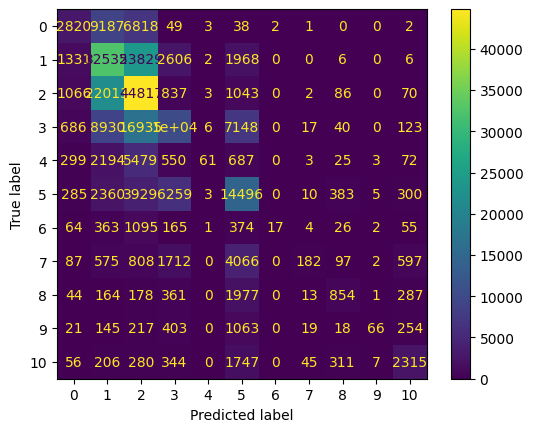

In [ ]:
cm = confusion_matrix(Y_test, y_pred_1)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
cm = confusion_matrix(Y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from sklearn.linear_model import